In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(80013493)

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x,w) +w0
p = tf.nn.softmax(f)

In [0]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [0]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
#100번마다 test dataset을 사용하여 accuracy를 측정
i = 0
for _ in range(2000):
  i+=1
  batch_xs, batch_ts = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
  if i%100 == 0:
    loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x:mnist.test.images, t:mnist.test.labels})
    print('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val, acc_val))

Step: 100, Loss: 7580.796875, Accuracy: 0.845200
Step: 200, Loss: 5377.391602, Accuracy: 0.880700
Step: 300, Loss: 4537.001953, Accuracy: 0.890400
Step: 400, Loss: 4080.055420, Accuracy: 0.898100
Step: 500, Loss: 3797.403320, Accuracy: 0.904500
Step: 600, Loss: 3594.428467, Accuracy: 0.907800
Step: 700, Loss: 3445.108643, Accuracy: 0.908700
Step: 800, Loss: 3332.149658, Accuracy: 0.911600
Step: 900, Loss: 3245.615723, Accuracy: 0.913700
Step: 1000, Loss: 3171.083984, Accuracy: 0.914500
Step: 1100, Loss: 3127.454834, Accuracy: 0.913800
Step: 1200, Loss: 3104.250488, Accuracy: 0.914600
Step: 1300, Loss: 3039.802734, Accuracy: 0.913800
Step: 1400, Loss: 2978.332275, Accuracy: 0.918200
Step: 1500, Loss: 2980.387207, Accuracy: 0.918100
Step: 1600, Loss: 2944.299072, Accuracy: 0.918600
Step: 1700, Loss: 2914.679199, Accuracy: 0.918600
Step: 1800, Loss: 2885.906250, Accuracy: 0.920300
Step: 1900, Loss: 2856.550049, Accuracy: 0.920400
Step: 2000, Loss: 2849.243164, Accuracy: 0.921700


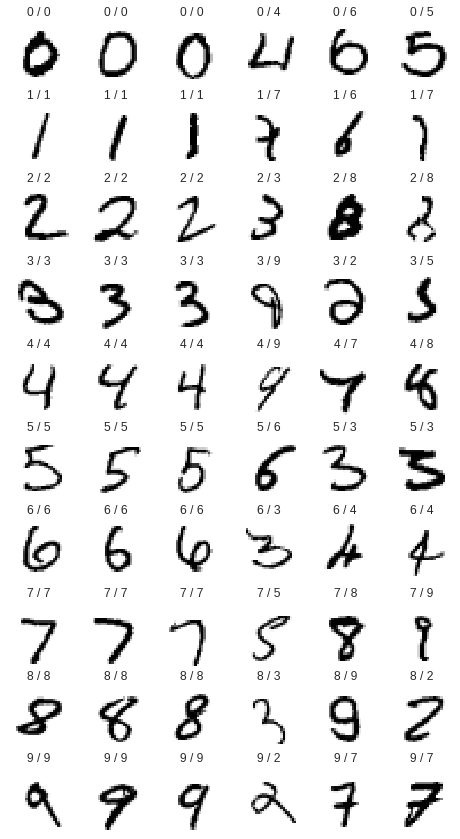

In [8]:
#정답과 오답 예를 3개씩 출력
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
  c = 1
  for(image, label, pred) in zip(images, labels, p_val):
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction != i:
      continue
    if (c < 4 and i == actual) or ( c>=4 and i != actual):
      subplot = fig.add_subplot(10,6,i*6+c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.set_title('%d / %d' %(prediction, actual))
      subplot.imshow(image.reshape((28,28)), vmin=0,vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
      c += 1
      if c > 6:
        break